<a href="https://colab.research.google.com/github/mikckel/Task1_House_Price_Prediction/blob/main/house_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Load the dataset

In [52]:
data = pd.read_csv("house_price_data.csv")

# Display the first few rows and summary statistics

In [53]:
print(data.head())
print(data.describe())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Plot the distribution of bedrooms

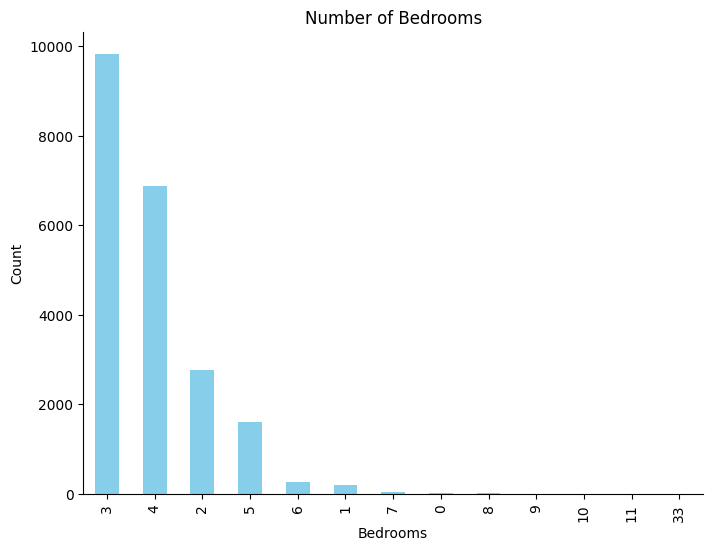

In [54]:
plt.figure(figsize=(8, 6))
data['bedrooms'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()
plt.show()

# Plot the geographic distribution of properties

<Figure size 1200x800 with 0 Axes>

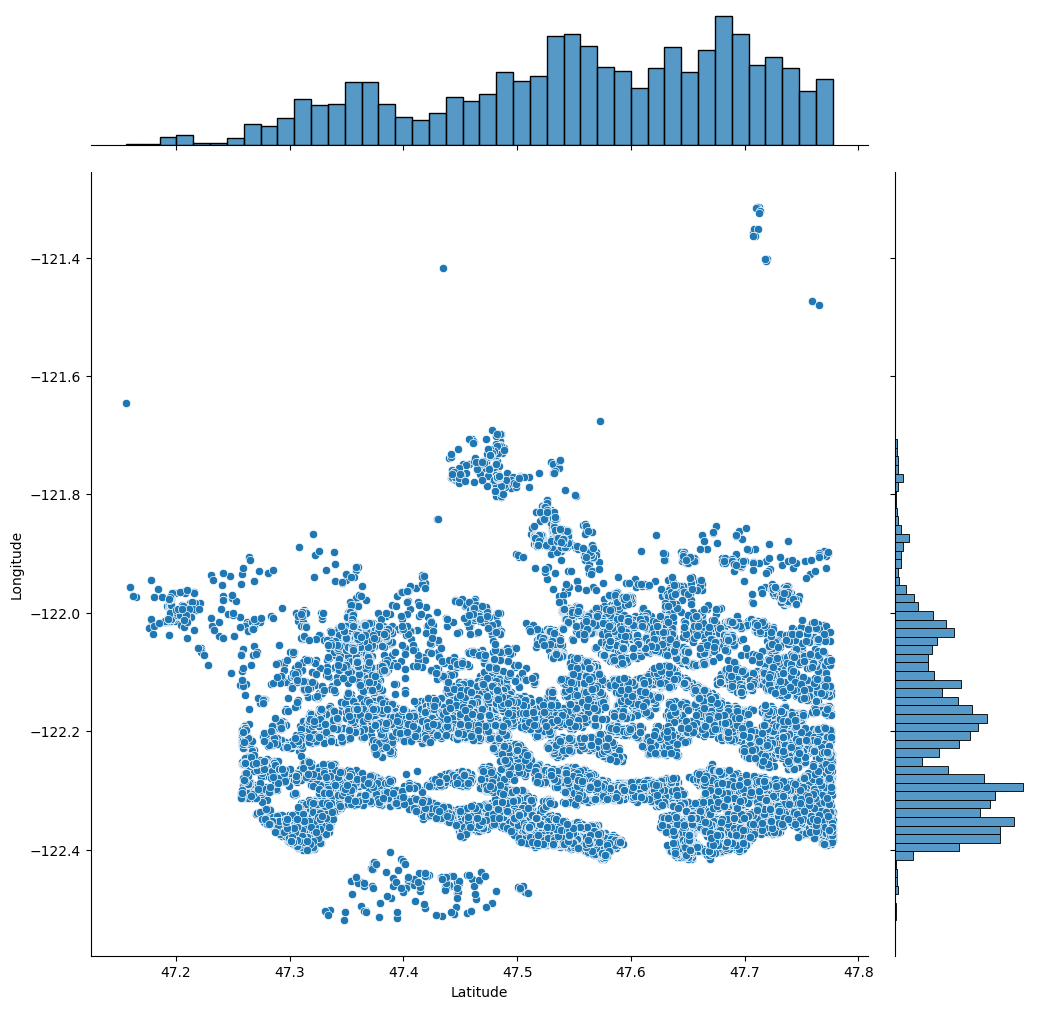

In [55]:
plt.figure(figsize=(12, 8))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Scatter plots for different features

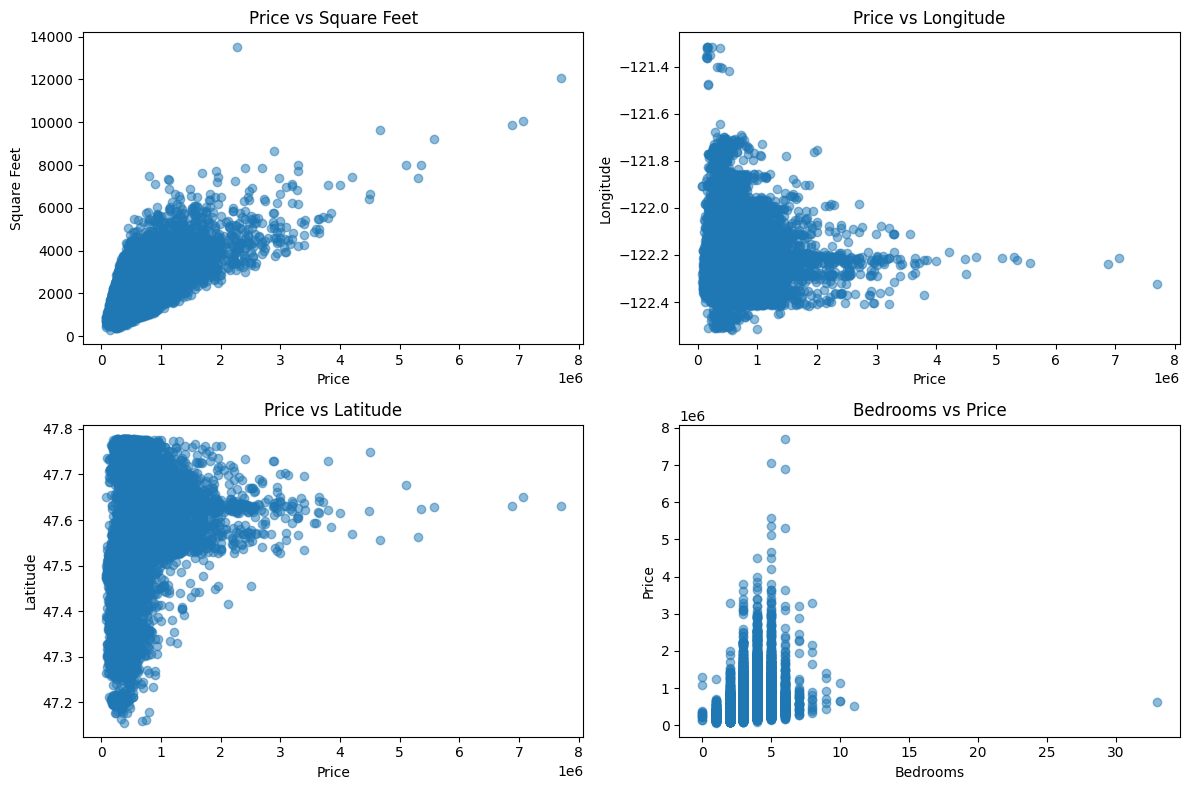

In [56]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(data.price, data.sqft_living, alpha=0.5)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Square Feet")

plt.subplot(2, 2, 2)
plt.scatter(data.price, data.long, alpha=0.5)
plt.title("Price vs Longitude")
plt.xlabel("Price")
plt.ylabel("Longitude")

plt.subplot(2, 2, 3)
plt.scatter(data.price, data.lat, alpha=0.5)
plt.title("Price vs Latitude")
plt.xlabel("Price")
plt.ylabel("Latitude")

plt.subplot(2, 2, 4)
plt.scatter(data.bedrooms, data.price, alpha=0.5)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

# Additional scatter plots

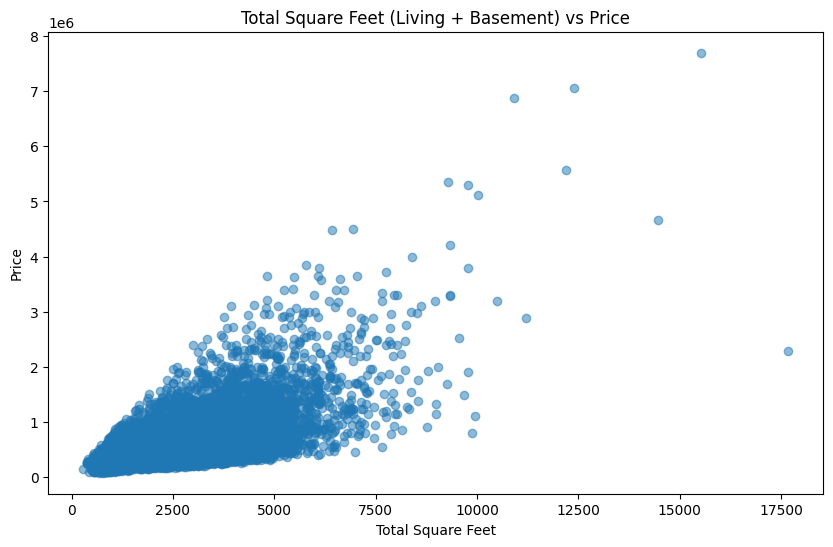

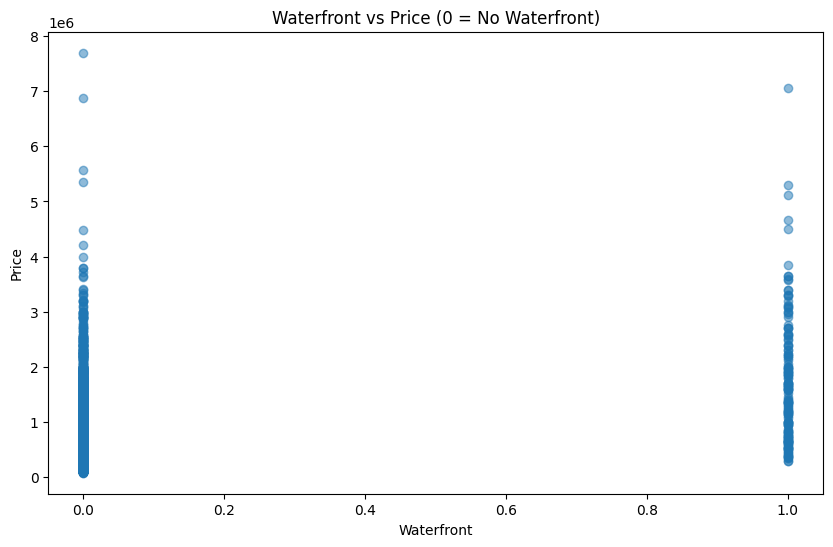

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'], alpha=0.5)
plt.title("Total Square Feet (Living + Basement) vs Price")
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data.waterfront, data.price, alpha=0.5)
plt.title("Waterfront vs Price (0 = No Waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()

# Prepare the data for training

In [58]:
features = data.drop(['id', 'price'], axis=1)
labels = data['price']

# Convert date feature

In [59]:
features['date'] = features['date'].apply(lambda x: 1 if '2014' in x else 0)


# Split the data into training and testing sets

In [60]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=2)

# Train a Linear Regression model

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

# Evaluate the Linear Regression model

In [62]:
print(f"Linear Regression R^2 Score: {lin_reg.score(x_test, y_test):.4f}")

Linear Regression R^2 Score: 0.7336


# Train a Gradient Boosting Regressor

In [50]:
gbr = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='squared_error')
gbr.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

# Evaluate the Gradient Boosting Regressor

In [63]:
print(f"Gradient Boosting Regressor R^2 Score: {gbr.score(x_test, y_test):.4f}")

Gradient Boosting Regressor R^2 Score: 0.9217


# Plot training and test deviance

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


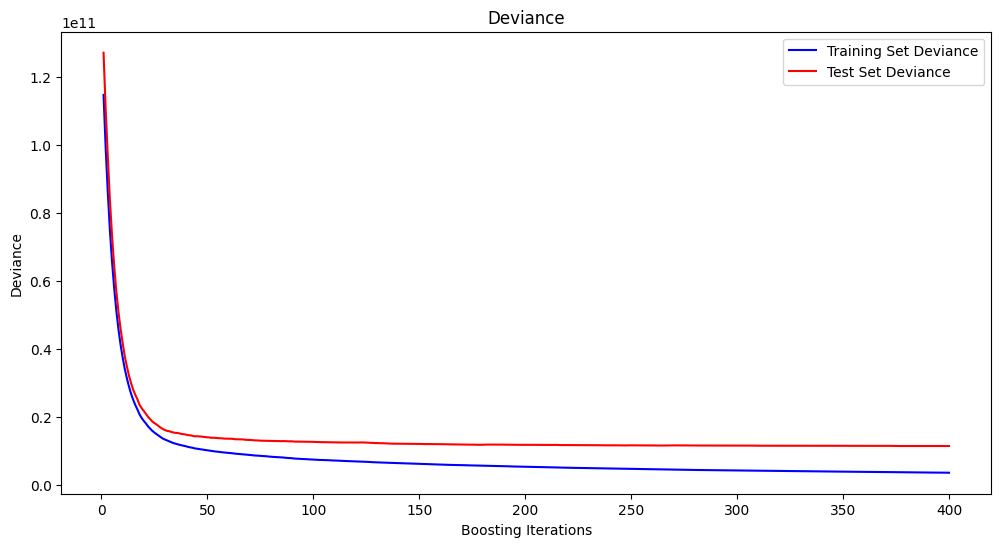

In [64]:
n_estimators = gbr.get_params()['n_estimators']
test_deviance = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(x_test)):
    test_deviance[i] = gbr.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(n_estimators) + 1, gbr.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_deviance, 'r-', label='Test Set Deviance')
plt.title('Deviance')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.legend()
plt.show()

# Apply PCA for dimensionality reduction

In [65]:
pca = PCA()
pca_transformed = pca.fit_transform(scale(features))

# Plot the number of floors vs price

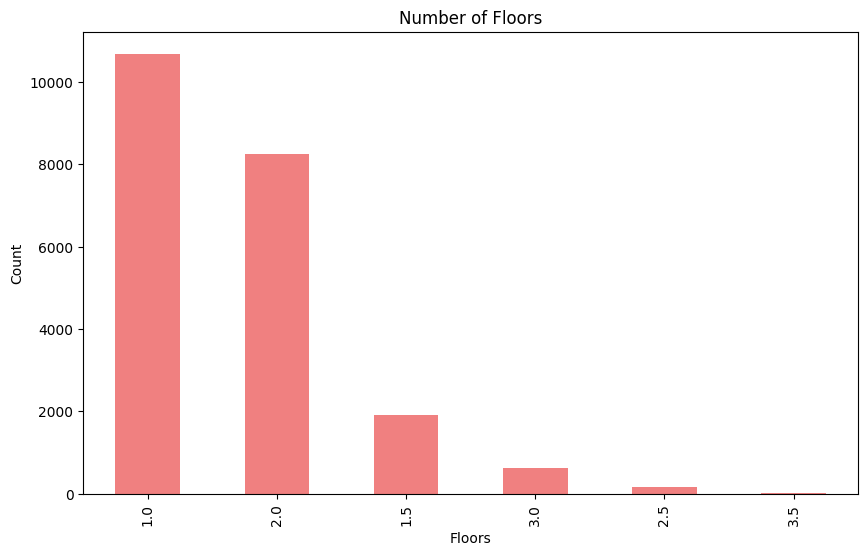

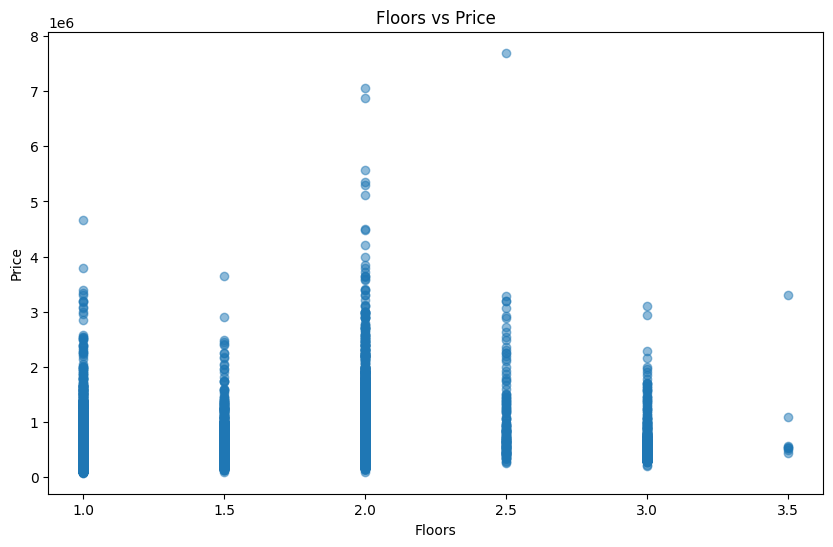

In [66]:
plt.figure(figsize=(10, 6))
data.floors.value_counts().plot(kind='bar', color='lightcoral')
plt.title('Number of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data.floors, data.price, alpha=0.5)
plt.title("Floors vs Price")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

# Plot the condition vs price

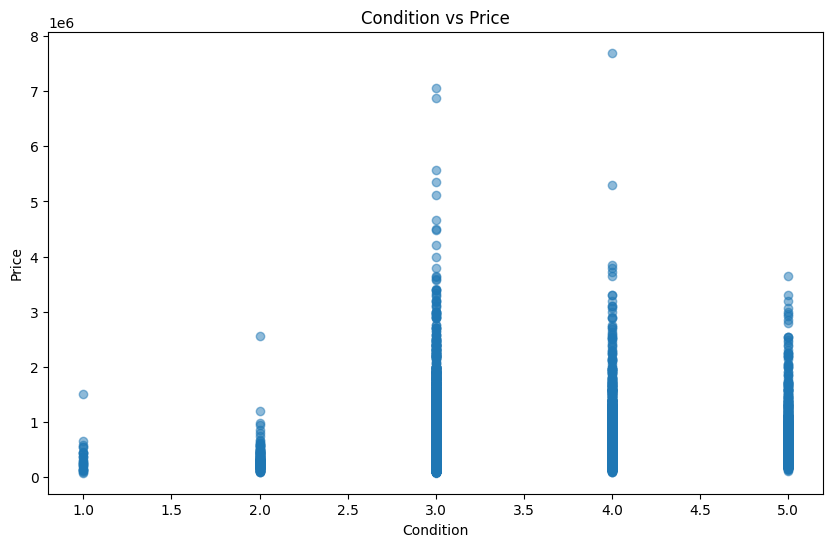

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(data.condition, data.price, alpha=0.5)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

# Plot the zipcode vs price

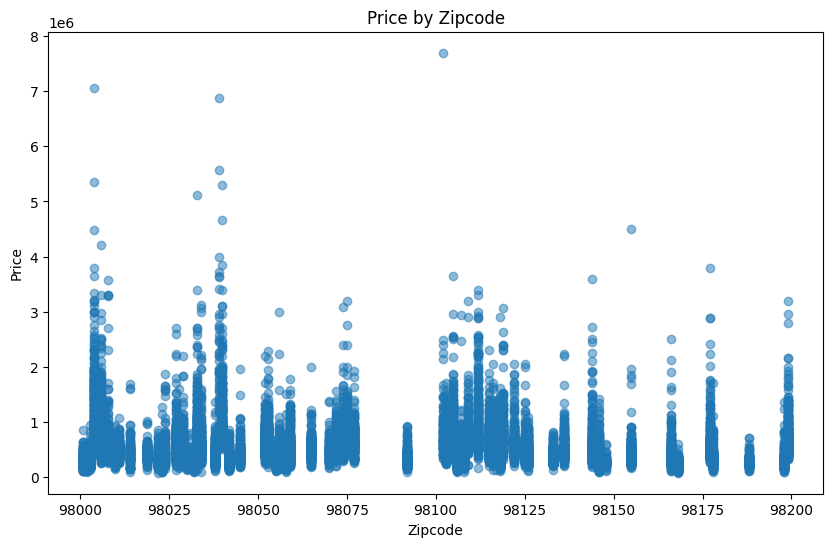

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(data.zipcode, data.price, alpha=0.5)
plt.title("Price by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()